## Домашнее задание 2

Дедлайн — ***6.09.18 12:00***. 

Выполненные задания можно присылать на почту zueva.nn@phystech.edu либо загружать в папку в своем репозитории.

В этом задании предлагается продолжить то, что мы начали делать на семинаре — принять участие в соревновании на платформе 'Kaggle'!

Мы будем работать с  уже знакомым нам соревнованием **House Prices: Advanced Regression Techniques**: 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Задачей является предсказание цены дома по большому набору фич. Вам необходимо обучиться на `train.csv` и отправить свои предсказания для данных, которые лежат в `test.csv`. Все данные находятся в папке **Seminars/Seminar2**. Там же можно найти `baseline solutions` — базовые и простые решения без особых надстроек.


### Часть 1

1. Если вы еще не зарегистрированы на платформе `Kaggle`, то это можно сделать здесь: www.kaggle.com.
   Регистрация нужна для того, чтобы Ваши посылки были привязаны к конкретному аккаунту. 
2. После регистрации на ресурсе нужно стать участником соревнования: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
3. После того, как вы зарегистрировались на участие в конкретном соревновании, вы готовы работать с данными. Обычно их можно скачать в разделе `Data`, но данные оттуда уже лежат в папке **Seminars/Seminar2**.

### Часть 2

Как только вы зарегистрировались и скачали данные, можно приступать к работе с ними.
1. Загрузите данные с помощью функций из пакета `Pandas` read_csv(). Обратите внимание на параметры — если у данных в первой строке стоят названия столбцов, то параметр **Header** нужно сделать истинным. Если данные вводятся через запятую, то параметру **sep** (separator) нужно передать символ `,`. Подробнее про параметры read_csv можно почитать здесь: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html. Как видите, их очень много и чтение файла можно настроить очень тонко

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")

labels = train["SalePrice"]

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


С какими типами признаков вы столкнулись?


Ответ: самое неинтересное это NAN в текстовых данных..

### Часть 3
Какие признаки выглядят бесполезными? Попробуйте выбросить некоторые фичи, опираясь на ваш личный жизненный опыт или алгоритмы `feature selection`. Подробнее про них можно прочитать здесь: http://scikit-learn.org/stable/modules/feature_selection.html

In [5]:
all = pd.concat([train, test], axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [6]:
to_drop = ["Id","YrSold","MoSold",'SaleType','GarageArea','GarageQual','GarageCond','LotConfig','LandSlope','Neighborhood',
           'Condition1','Condition2','OverallCond','RoofStyle','RoofMatl','ExterCond','Foundation','BsmtCond', 'BsmtExposure',
           'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF','LowQualFinSF']

"""to_replace_to_none = ["MSZoning", "Alley"] #пример
for col in to_replace_to_none:
    all[col].fillna("No" + col, inplace=True)
"""
all.drop(to_drop, axis=1, inplace=True, errors="ignore")
all.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,EnclosedPorch,Fireplaces,FullBath,GarageCars,...,OpenPorchSF,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
count,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,0.429894,0.061364,23.098321,0.597122,1.568003,1.766621,...,47.486811,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474
std,392.362079,428.701456,25.188169,0.822693,0.524736,0.245687,64.244246,0.646129,0.552969,0.761624,...,67.575493,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000
50%,1082.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,...,26.000000,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000
75%,1387.500000,704.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,...,70.000000,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000
max,5095.000000,2065.000000,508.000000,8.000000,3.000000,2.000000,1012.000000,4.000000,4.000000,5.000000,...,742.000000,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000


In [43]:
Numer = all.select_dtypes(exclude=['object'])
Param = all.select_dtypes(include=['object'])

Numer.fillna(0, inplace=True)
Param.fillna('NA', inplace=True)

#Param = [c for c in train_Par if len(train[c].unique())<5]
#for c in Param:
#    print (c,len(all[c].unique()))

Param_B=pd.get_dummies(Param)
Param_B_train = Param_B.iloc[:train.shape[0]]
Param_B_test = Param_B.iloc[train.shape[0]:]

Numer_train = Numer.iloc[:train.shape[0]]
Numer_test = Numer.iloc[:test.shape[0]]

print (Param_B_train.shape)
print (Param_B_test.shape)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


(1460, 154)
(1459, 154)


In [74]:
train_full = pd.concat([Numer_train,Param_B_train], axis=1)
train_full_x = train_full.drop('SalePrice',axis=1)
train_full_y = train_full['SalePrice']
train_full_x.dtypes

test_full = pd.concat([Numer_test,Param_B_test], axis=1)
test_full_x = test_full.drop('SalePrice',axis=1)
test_full_y = test_full['SalePrice']

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=25)
cross_val_score(rf, train_full_x, train_full_y, scoring='accuracy') 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


array([0.00841346, 0.01871658, 0.01181102])

In [76]:
rf.fit(train_full_x, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

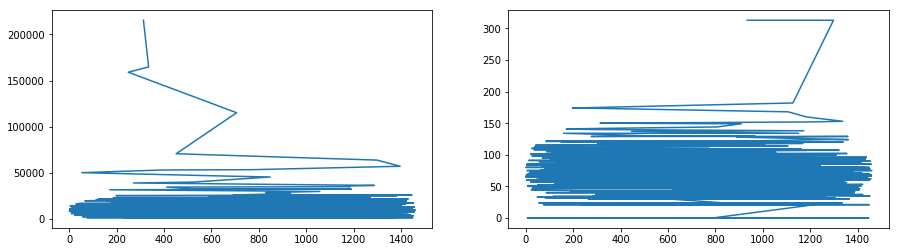

In [77]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))
ax1.plot(train_full_x['LotArea'].sort_values())
ax2.plot(train_full_x['LotFrontage'].sort_values())
#Это графики будущего!! советую )

In [78]:
#categorial = [#отобранные вами категориальные признаки]
#all[col] = all[col].factorize()[0]  - это не понял для чего..
    
#train = all.iloc[:train.shape[0]] - это использовал выше
#test = all.iloc[train.shape[0]:]

Попробуйте запустить обучение на разных алгоритмах (пример запуска в семинарах):
1. Линейная регрессия http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
2. Решающее дерево http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
3. Случайный лес http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
4. Градиентный бустинг http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

И любые другие модели, которые покажутся вам интересными :)

P.S.не забудьте использовать **cross_validation** и **K-Fold!**
Также можно распараллелить процесс обучения, если параметру *n_jobs* в регрессор передать значение *-1*.
С помощью  *cross_val_score* можно оценивать качество построенной модели.
Также у каждого регрессора есть множество *параметров*. Подробно про них можно прочитать в документации http://scikit-learn.org

Пример запуска модели можно найти в **Seminars/Seminar2**.

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

#regr = LinearRegression(#тут параметры)
#print(cross_val_score(regr, train, np.log1p(labels), scoring="mean_squared_error", cv=cv).mean())

In [98]:
#функция для формирования файла для отправки в соревнование
#def submit(preds):
submission = pd.DataFrame()
submission["Id"]= test['Id']
submission["SalePrice"] = preds
submission.to_csv("submission.csv", index=False)

#regr = LinearRegression(#тут параметры)
#regr.fit(train, np.log1p(labels))
preds = rf.predict(test_full_x)
#submit(np.expm1(preds))

#def code_freq(data, col):
#    return data[col].map(data.groupby(col).count().iloc[:, 0] / data.shape[0])



In [93]:
preds

array([145000, 181900, 223500, ..., 181000, 164000, 125000], dtype=int64)

### Часть 4
После того, как вы сформировали файл `submission.csv`, он появится в той же директории, где находится основной Jupyter Notebook. Далее его необходимо отправить в систему. Для этого нужно нажать на `Submit Predictions`.
Далее вы нажиматее `Upload Submission File` и отправляете туда `submission.csv` (сам код отправлять в этом соревновании не нужно!). После того, как Вы нажали `Submit`, Kaggle перенаправит вас на *Leader board*, где вы сможете увидеть свой *score* и место среди всех участников.
Будьте внимательны, нельзя делать больше 10 посылок в день!

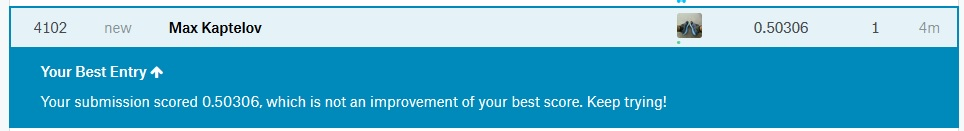

In [100]:
from IPython.display import Image
Image("1.jpg")

Идеи, как можно улучшить результат:
* Найти какие категориальные признаки являются ординальными и закодировать их соответственно
* Найти наиболее важные категориальные признаки и попробовать их закодировать разными способами
* Потюнить регрессор
* Сгенерировать новые признаки

### Часть 4
Опишите полученные результаты, какого скора Вы смогли добиться, какое место заняли? Какой алгоритм оказался лучше других? Можете ли Вы объяснить, почему так вышло?

Ответ:

In [ ]:
"Опишите полученные результаты:" Результаты радуют тем что они есть.
"какого скора Вы смогли добиться, какое место заняли?" добился такого скора, что влез на kaggle.com 
на первую видимую страницу с результатами =)
"Какой алгоритм оказался лучше других?" выбор сразу пал на Лес, другие даже не смотрел.
"Можете ли Вы объяснить, почему так вышло?"  почему только 1 рассмотрел? буду спирать всё на время... не хватило, 
но срадостью попробую другие методы не в рамках обучения, чтобы повысить скор, тема интересная и ранее с этим не работал.